In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import csv

## Helper Functions

In [2]:
def getScatteringFactor(element, emin, emax):
    dataDir = os.path.join('include', 'scatfacts')
#     dataElements = [x[:-4] for x in os.listdir(dataDir)]

    fid = os.path.join(dataDir, '{0}.nff'.format(str.lower(element)))
    with open(fid, 'r') as f:
        data = np.genfromtxt(f)[1:, :]
    e_raw = data[:, 0]
    f1_raw = data[:, 1]
    f2_raw = data[:, 2]

    energy = np.linspace(emin, emax, 2500)
    f1 = np.interp(energy, e_raw, f1_raw)
    f2 = np.interp(energy, e_raw, f2_raw)
    return energy, f1, f2

In [3]:
def getMolarMass(element):
    dataPath = os.path.join('include', 'Molar Masses.txt')
    molarMass = None
    with open(dataPath, 'r') as f:
        reader = csv.reader(f, delimiter=',', quotechar='|')
        for row in reader:
            if row[0] == element:
                molarMass = float(row[1])
                break
    return molarMass

In [4]:
N_a = 6.022e23
c = (1e-16)/(np.pi*0.9111)  # eV*cm^2


def calcAttenuationCoefficient(elements, numElements, density, emin=10, emax=1000):
    energy = None
    f2 = None
    mass = 0
    for i, el, num in zip(range(len(elements)), elements, numElements):
        e, _, f2temp = getScatteringFactor(el, emin, emax)
        if energy is None:
            energy = e
            f2 = f2temp
        f2 = f2 + num*f2temp
        mass = mass + num*getMolarMass(el)

    mu = (density*N_a/mass) * (2*c/e) * f2
    return e, mu

In [9]:
def calcTransmission(elements, numElements, density, thickness, emin=10, emax=1000):
    e, mu = calcAttenuationCoefficient(
        elements, numElements, density, emin, emax)

    t = np.exp(-mu*thickness)

    return e, t

## Henke Transmission Calculator

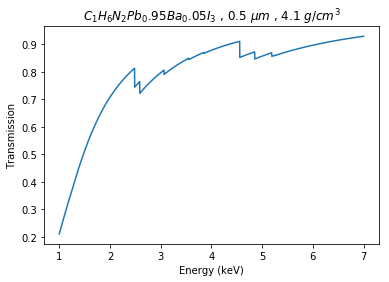

In [10]:
elements = ['C', 'H', 'N', 'Pb', 'Ba', 'I']
numElements = [1, 6, 2, 0.95, 0.05, 3]
density = 4.1
thickness = 500e-7  # thickness in cm
emin = 1000  # in eV
emax = 7000  # in eV

e, t = calcTransmission(elements, numElements, density, thickness, emin, emax)

plt.plot(e/1000, t)
plt.xlabel('Energy (keV)')
plt.ylabel('Transmission')

titlestr = ''
for el, num in zip(elements, numElements):
    titlestr = titlestr + '${0}_{1}$'.format(el, num)

titlestr = titlestr + ' , ${0}$ $\mu m$'.format(thickness*1e4)
titlestr = titlestr + ' , ${0}$ $g/cm^3$'.format(density)

plt.title(titlestr)
plt.show()

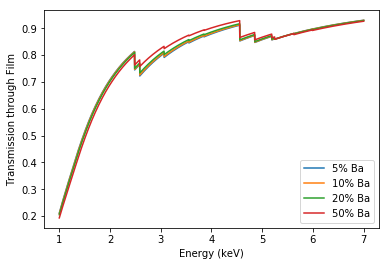

In [15]:
emin = 1000
emax = 7000

layers = {
    '5% Ba': {
        'Elements': ['C', 'H', 'N', 'Pb', 'Ba', 'I'],
        'NumElements': [1, 6, 2, 0.95, 0.05, 3],
        'Density': 4.1,
        'Thickness': 500e-7
    },
    '10% Ba': {
        'Elements': ['C', 'H', 'N', 'Pb', 'Ba', 'I'],
        'NumElements': [1, 6, 2, 0.9, 0.1, 3],
        'Density': 4.1,
        'Thickness': 500e-7
    },
    '20% Ba': {
        'Elements': ['C', 'H', 'N', 'Pb', 'Ba', 'I'],
        'NumElements': [1, 6, 2, .8, 0.2, 3],
        'Density': 4.1,
        'Thickness': 500e-7
    },
    '50% Ba': {
        'Elements': ['C', 'H', 'N', 'Pb', 'Ba', 'I'],
        'NumElements': [1, 6, 2, 0.5, 0.5, 3],
        'Density': 4.1,
        'Thickness': 500e-7
    },
}

allt = []
for l, p in layers.items():
    e, t = calcTransmission(
    p['Elements'],
    p['NumElements'],
    p['Density'],
    p['Thickness'],  # in cm
    emin=emin,
    emax=emax
)
    plt.plot(e/1000, t, label = l)

plt.legend()
plt.xlabel('Energy (keV)')
plt.ylabel('Transmission through Film')
plt.show()

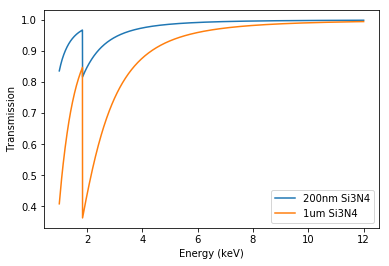

In [8]:
plt.plot(e/1000, t_Si3N4, label='200nm Si3N4')
plt.plot(e/1000, t_Si_15um, label='1um Si3N4')
plt.legend()
plt.xlabel('Energy (keV)')
plt.ylabel('Transmission')
plt.show()

## Angle-Dependent, Forward/Backward Transmission Comparison

#### Constants

Define top layers

In [71]:
top = [
    {
        'Elements': ['Au'],
        'NumElements': [1],
        'Density': 19.32,
        'Thickness': 80e-7
    },
    {
        'Elements': ['C', 'H', 'N', 'O'],
        'NumElements': [81, 68, 4, 8],
        'Density': 1.06,
        'Thickness': 250e-7
    },
    {
        'Elements': ['C', 'H', 'N', 'Pb', 'I'],
        'NumElements': [1, 6, 2, 1, 3],
        'Density': 4.1,
        'Thickness': 500e-7
    },
]

Define bottom layers (substrate side)

In [91]:
bottom = [
    {
        'Elements': ['Si', 'N'],
        'NumElements': [3, 4],
        'Density': 3.44,
        'Thickness': 250e-7
    },
    {
        'Elements': ['Sn', 'O'],
        'NumElements': [1, 1.5],
        'Density': 6.7,  #SnO = 6.45 g/cm3, SnO2 = 6.95 g/cm3
        'Thickness': 20e-7
    },
    {
        'Elements': ['C', 'H', 'N', 'Pb', 'I'],
        'NumElements': [1, 6, 2, 1, 3],
        'Density': 4.1,
        'Thickness': 500e-7
    },
]

Measurement conditions

In [92]:
sampleTheta = 15 # in degrees
xrdTheta = 27.75
xrfTheta = 90

minEnergy = 1000 # eV
maxEnergy = 10000 # eV

#### Calculator

Thickness correction for given angles

In [93]:
# xrdFactor = (1/np.sin(np.deg2rad(sampleTheta))) + (1/np.sin(np.deg2rad(xrdTheta)))   #incoming beam attenuation, exit beam attenuation to xrd detector
# xrfFactor = (1/np.sin(np.deg2rad(sampleTheta))) + (1/np.cos(np.deg2rad(sampleTheta))) #incoming beam attenuation, exit beam attenuation to xrf detector

xrdFactor = (1/np.sin(np.deg2rad(xrdTheta)))   #only exit beam attenuation to xrd detector
xrfFactor = (1/np.cos(np.deg2rad(sampleTheta))) #only exit beam attenuation to xrf detector

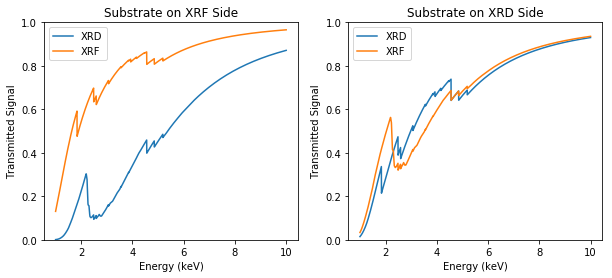

In [94]:
e = None
xrdTransmission = 1
for l in top:
    layerTransmission = calcTransmission(
        l['Elements'],
        l['NumElements'],
        l['Density'],
        l['Thickness'] * xrdFactor,  # in cm
        emin=minEnergy,
        emax=maxEnergy
    )
    xrdTransmission = xrdTransmission * layerTransmission[1]
    
xrfTransmission = 1
for l in bottom:
    layerTransmission = calcTransmission(
        l['Elements'],
        l['NumElements'],
        l['Density'],
        l['Thickness'] * xrfFactor,  # in cm
        emin=minEnergy,
        emax=maxEnergy
    )
    xrfTransmission = xrfTransmission * layerTransmission[1]
    e = layerTransmission[0]

xrdTransmissionFlipped = 1
for l in bottom:
    layerTransmission = calcTransmission(
        l['Elements'],
        l['NumElements'],
        l['Density'],
        l['Thickness'] * xrdFactor,  # in cm
        emin=minEnergy,
        emax=maxEnergy
    )
    xrdTransmissionFlipped = xrdTransmissionFlipped * layerTransmission[1]
    
xrfTransmissionFlipped = 1
for l in top:
    layerTransmission = calcTransmission(
        l['Elements'],
        l['NumElements'],
        l['Density'],
        l['Thickness'] * xrfFactor,  # in cm
        emin=minEnergy,
        emax=maxEnergy
    )
    xrfTransmissionFlipped = xrfTransmissionFlipped * layerTransmission[1]
    e = layerTransmission[0]

    
fig, ax = plt.subplots(1,2, figsize = (10, 4))
ax[0].plot(e/1000, xrdTransmission, label = 'XRD')
ax[0].plot(e/1000, xrfTransmission, label = 'XRF')
ax[0].legend()
ax[0].set_xlabel('Energy (keV)')
ax[0].set_ylabel('Transmitted Signal')
ax[0].set_title('Substrate on XRF Side')
ax[0].set_ylim([0, 1])

ax[1].plot(e/1000, xrdTransmissionFlipped, label = 'XRD')
ax[1].plot(e/1000, xrfTransmissionFlipped, label = 'XRF')
ax[1].legend()
ax[1].set_xlabel('Energy (keV)')
ax[1].set_ylabel('Transmitted Signal')
ax[1].set_title('Substrate on XRD Side')
ax[1].set_ylim([0, 1])
plt.show()

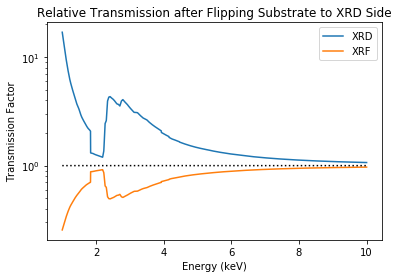

In [95]:
plt.plot(e/1000, xrdTransmissionFlipped/xrdTransmission, label = 'XRD')
plt.plot(e/1000, xrfTransmissionFlipped/xrfTransmission, label = 'XRF')
plt.plot(e/1000, np.ones(e.shape), ':', color = [0, 0 ,0])
plt.yscale('log')
plt.xlabel('Energy (keV)')
plt.ylabel('Transmission Factor')
plt.legend()
plt.title('Relative Transmission after Flipping Substrate to XRD Side')
plt.show()

In [96]:
sn250nm = xrfTransmission

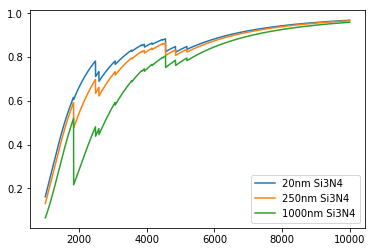

In [97]:
plt.plot(e, sn20nm, label = '20nm Si3N4')
plt.plot(e, sn250nm, label = '250nm Si3N4')
plt.plot(e, sn1000nm, label = '1000nm Si3N4')
plt.legend()
plt.show()


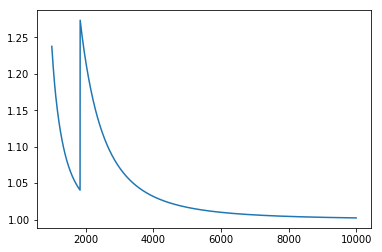

In [99]:
plt.plot(e, sn20nm/sn250nm)
# plt.plot(e, sn250nm/sn1000nm)
plt.xlabel('')
plt.show()
